<a href="https://colab.research.google.com/github/alexDahersh/Data-Science-fund./blob/main/Alex_HershU3proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is the probability of the temperature on a Summer day in 2025

I initially wanted to do the expected number of days in 2025 over 100 degrees, but I changed the question so it was no longer based on yes and no.

### Imports

In [ ]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.9 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 22.7 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency con

In [ ]:
import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
from scipy.stats import skew as sk # I looked for a way to calculate the skew of a numpy array and I found in the scipy documentation that they have a way to do it
# Every single bit of scipy that I will use is either taken or modified directly from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html
# This import line was modified directly from that link

## Defining Data and Question

My question is what is the probability of different temperatures in the Summer of 2025. As we all know, it's hot in Austin, especilly so for these past two years. In fact, in 2023 and 2022 there was a high pressure system around Austin, informally called the heat dome, which made it even more hot. The heat dome is somewhat unpredictable, so I'm going to assume that making one dataset won't erase the impact of the heat dome instead of doing something complex to account for it. The data I'm going to use is the weather data for Austin in 2022-2024. At the time of collecting the data, the data was only in up until september 8th 2024, so I'm going to also make the assumption that this won't negatively impact anything.

### Code Defining Data

I'm going to reuse my data from the unit 2 project and add some more years (all data taken from taken from https://www.weather.gov/wrh/Climate?wfo=ewx)

In [ ]:
june23SumTemps = np.array([103,94,99,103,103,105,105,103,101,102]) # Data taken from Austin in June 2023. Summer started June 21st last year so the first value is from June 2023
july23SumTemps = np.array([102, 98, 99, 97, 99, 92, 95, 102, 104, 105, 105, 108, 107, 107, 107, 106, 108, 107, 106, 106, 104, 105, 106, 105, 104, 103, 103, 102, 104, 104, 107]) # Data from July 2023
aug23SumTemps = np.array([106, 105, 104, 105, 106, 105, 106, 106, 108, 107, 108, 106, 106, 106, 102, 104, 110, 106, 104, 107, 105, 99, 101, 105, 107, 107, 109, 100, 99, 101, 102]) # Data from August 2023
sep23SumTemps = np.array([100, 101, 102, 102, 104, 103, 105, 107, 104, 99, 98, 94, 89, 94, 89, 85, 94, 96, 98, 99, 97, 99, 101]) # Data from September 2023. Summer ended September 23 in 2023 so the last value is the 23rd

june24SumTemps = np.array([91, 93, 95, 96, 97, 98, 97, 100, 100, 101, 100]) # June 2024. First value is the 20th
july24SumTemps = np.array([101, 102, 101, 101, 101, 99, 95, 96, 98, 100, 100, 93, 94, 96, 100, 101, 101, 98, 98, 98, 98, 88, 81, 92, 91, 88, 86, 89, 97, 96, 96]) # July 2024
aug24SumTemps = np.array([98, 100, 100, 98, 97, 98, 102, 101, 99, 99, 99, 100, 100, 101, 102, 101, 101, 102, 104, 106, 109, 107, 102, 99, 99, 93, 92, 97, 94, 94, 96]) # August 2024
sep24SumTemps = np.array([95, 92, 88, 90, 89, 92, 91, 88]) # September 2024. Up to the 8th because I took the data on the 9th

june22SumTemps = np.array([101, 101, 104, 103, 103, 103, 102, 94, 99, 99]) # June 2022. Started on the 21st
july22SumTemps = np.array([97, 101, 101, 101, 101, 102, 102, 104, 106, 110, 109, 109, 108, 103, 99, 102, 104, 106, 106, 106, 105, 103, 104, 105, 104, 104, 103, 103, 104, 104, 103]) # July 2022
aug22SumTemps = np.array([103, 105, 106, 106, 104, 99, 102, 102, 102, 104, 102, 104, 102, 94, 102, 101, 103, 103, 95, 101, 95, 98, 92, 94, 97, 98, 99, 98, 99, 87, 92]) # August 2022
sep22SumTemps = np.array([94, 95, 90, 92, 94, 96, 95, 95, 94, 95, 92, 92, 94, 93, 92, 96, 98, 97, 98, 98, 98, 99, 98]) # Sep 2022. Ended on the 22nd

allTempsList = [june22SumTemps, july22SumTemps, aug22SumTemps, sep22SumTemps, june23SumTemps, july23SumTemps, aug23SumTemps, sep23SumTemps, june24SumTemps, july24SumTemps, aug24SumTemps, sep24SumTemps] # making it easier to loop through the temps

In [ ]:
allTemps = [] # making list of all temps

for temps in allTempsList:
  for temp in temps:
    allTemps.append(temp)

(array([ 1.,  0.,  1.,  1.,  5.,  4.,  5., 11., 18., 10.,  9., 30., 21.,
       36., 23., 40., 15., 30.,  5.,  6.]), array([ 81.  ,  82.45,  83.9 ,  85.35,  86.8 ,  88.25,  89.7 ,  91.15,
        92.6 ,  94.05,  95.5 ,  96.95,  98.4 ,  99.85, 101.3 , 102.75,
       104.2 , 105.65, 107.1 , 108.55, 110.  ]), <BarContainer object of 20 artists>)
mean = 99.98892988929889


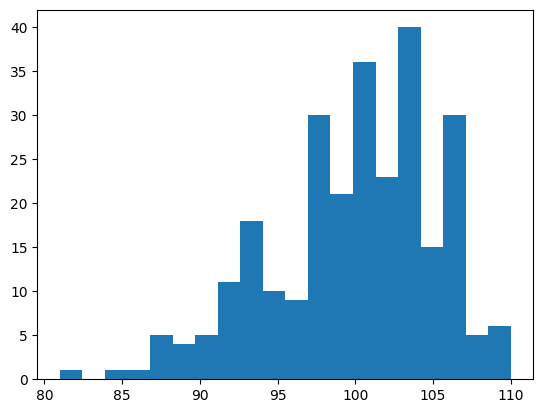

In [ ]:
numpyTemps = np.array(allTemps) # converting to a numpy array
print(plt.hist(numpyTemps, bins=20)) # plotting data
print("mean =", np.mean(numpyTemps)) # printing mean

In [ ]:
# ^ The data

I'm going to use the general shape of the data for both the prior and the likelihood. The shape seems to be skewed left with tails that go down in a somwhat bell curve like shape (so not a laplace distribution or something similar). There does seem to be a large variation between the peaks and the lows, but it still looks like there is some general shape. I'm going to assume the big differences between individual values is due to variability and isn't part of the actual distribution.

## Creating a Prior

First things first, my prior is going to be a bit on the high end because of climate change. Austin is getting hotter so I'm making the assumption that 2025 will be hotter than the average of the past 3 years. I'm also making the assumption that even though it will be hotter, it's likely that the temperature will be around the average of the past 3 years. In more simple terms, 2025 will be similar to the previous years but a bit hotter. I see no reason that 2025 will be some great outlier.

It's a reasonable assumption to make that the distribution of temperatures should be skewed left. The data already supports this and there is a somehwat soft cap on the maximum temperature; it's very very unlikely to go above 115 degrees. Even though more likely for outliers to appear below the mean for temperatures, I think it's a reasonable assumption to make that it's pretty unlikely for the temperature to go below 80 degrees. So the distribution I choose for my prior, based on my assumptions, would be skewed left but have neglidgeble tails.

#### Weibull Distribution

I'm first going to try a Weibull distribution and see how it works

[100.77913469416721, 25.29183132896469, -0.9184546014967054, 1.451128625194542]

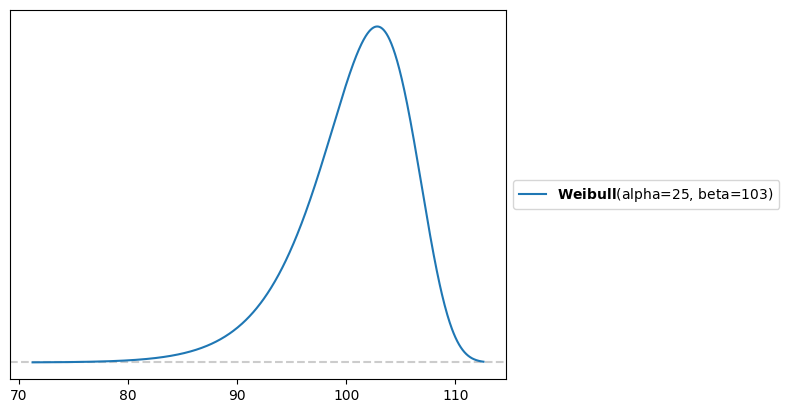

In [ ]:
# attempted Weibulls that looked off
# pz.Weibull(100,2)
# pz.Weibull(2,100)
# pz.Weibull(20,100)
# pz.Weibull(30,100)
# pz.Weibull(25,101)
# pz.Weibull(25,102)


pz.Weibull(25,103).plot_pdf()
pz.Weibull(25,103).moments()

The Weibull Distribution seems to heavily prioritize temperatures just above 100, which I find pretty close to the data I found. The distribution is skewed left and seems to have neglidgeible tails. The distribution also has a mean slightly above the mean of the data. Since the distribution fits all my assumptions I'm going to use it for the prior. This adds my final assumption for this prior which is a Weibull distribution with parameters (25,10) is a reasonable guess for the temperature on a Summer day in 2025.

#### Final Prior

Since the Weibull distributions seems to work, I'm going to use a Weibull(25,103) for the prior

In [ ]:
weatherPrior = pz.Weibull(25,103)

## Likelihood

(array([ 1.,  0.,  1.,  1.,  5.,  4.,  5., 11., 18., 10.,  9., 30., 21.,
       36., 23., 40., 15., 30.,  5.,  6.]), array([ 81.  ,  82.45,  83.9 ,  85.35,  86.8 ,  88.25,  89.7 ,  91.15,
        92.6 ,  94.05,  95.5 ,  96.95,  98.4 ,  99.85, 101.3 , 102.75,
       104.2 , 105.65, 107.1 , 108.55, 110.  ]), <BarContainer object of 20 artists>)


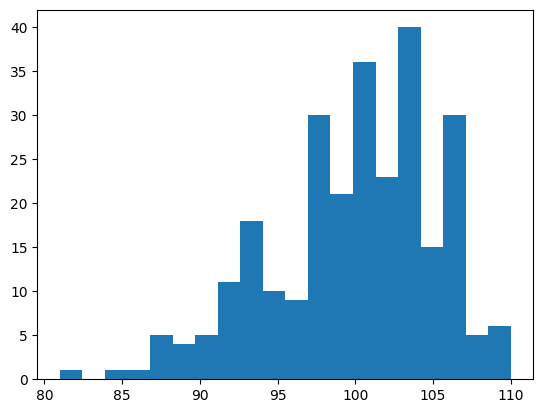

In [ ]:
print(plt.hist(numpyTemps, bins=20)) # plotting data

As I talked about before, to model the data I'm going to need a a left skewed distribution with a neglidgible tail and a somewhat bell-curve-like shape. Temperatures aren't likely to be above 110 and below 80 in the Summer. I'm going to be using the same assumptions I stated previously for these requirements.

As far as I can tell, the only distributions that fit this criteria are the skewed normal and Weibull distributions. I'm going to use ppc checks for both of these distributions to see which one works best. On the more scientific side of things, I think there is no reason the weather would better fit a skewed normal over a Weibull or vice versa. The Weibull distribution models something entirely different and the skewed normal distribution is a very nice distribution, but the weather doesn't act nicely.

### Testing Likelihoods

-0.6146371080289023 [-0.6130575077037799]


<Axes: >

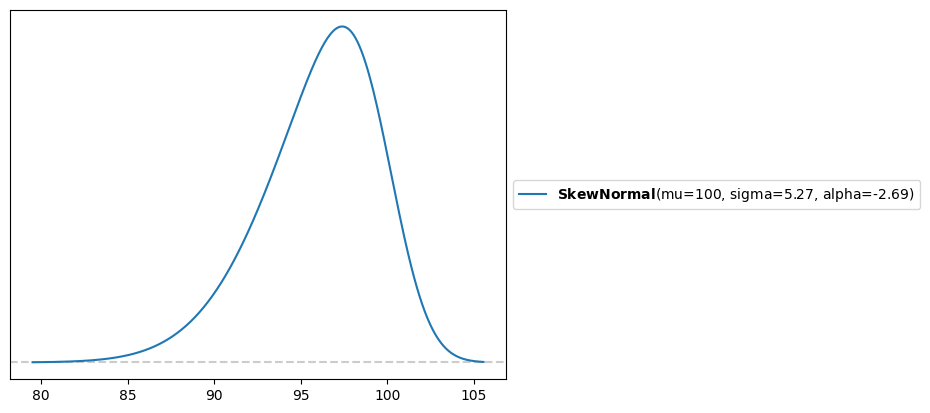

In [ ]:
dataMean = numpyTemps.mean()
dataSTD = numpyTemps.std()
dataSkew = sk(numpyTemps) # modified from scipy documentation

weatherLikelihood = pz.SkewNormal(dataMean,dataSTD,dataSkew*dataSTD*.83)
print(dataSkew, weatherLikelihood.moments(types='s'))
weatherLikelihood.plot_pdf()

This shape looks close to the shape of the data. I'm going to run a model to test how well it works. (This graph is somewhat unimortant because it won't be used at all)

#### Testing Posteriors From Skew Normal Likelihood

Using ppc tests to check the posterior

This model is running with the Weibull distribution as the prior. The standard deviation and skew are determined to be the same as the graph above.

In [ ]:
with pm.Model() as wmbyN_FT_model:
  θ = pm.Weibull('θ', alpha = 25, beta = 103)
  Y = pm.SkewNormal('Y' , mu = θ, sigma = dataSTD, alpha = (dataSTD*dataSkew*.83), observed = numpyTemps)
  idata_temps = pm.sample()

Output()

Output()

<Axes: title={'center': 'θ'}>

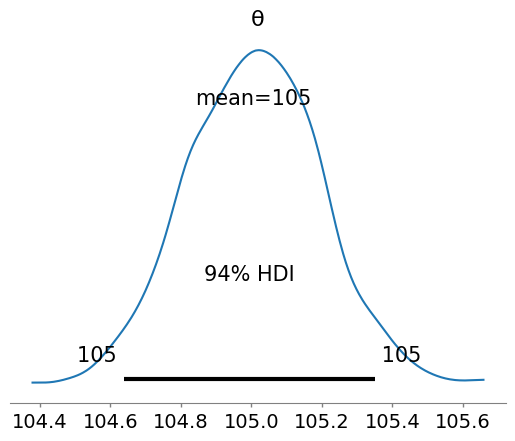

In [ ]:
az.plot_posterior(idata_temps)

The above graph is posterior with my initial prior and likelihood. At first, it surprised me that theta could be in the 105 range. The mean of the data is about 100, so this seemed totally wrong to me. But, I later realized that the skew will adjust the distribution to not have a mean of 105. I'm unsure of how good this posterior is, so I'm going to run a ppc test to find out. (Also, this is just the posterior of the variable theta, not the posterior of the chances of certain temperatures. The ppc will give a better look into the posterior distribution modelling the data)

Output()

<Axes: xlabel='Y'>

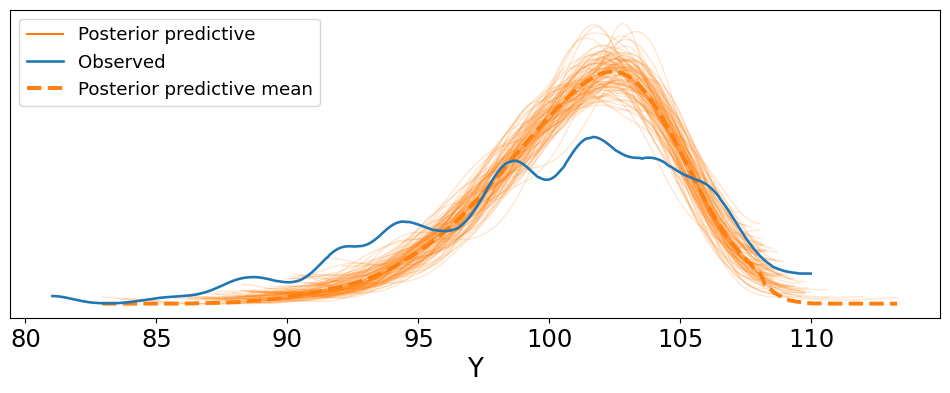

In [ ]:
# added this in later just to see. Ppc of the above posterior.
pm.sample_posterior_predictive(idata_temps, model=wmbyN_FT_model, extend_inferencedata=True)
az.plot_ppc(idata_temps, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

In [ ]:
numpyTemps.mean()

99.98892988929889

This looks like a pretty poor ppc check in my opinion. It's way too high and too low at some points. Other than being too high and too low, it actually does quite well. The skew looks right and the genral shape would be right with some fine tuning.

After thinking about it some, I think the problem is the skew normal distribution and maybe that I only have 1 prior. The model can only fiddle with one variable so it's unable to fully correct the likelihood to the data. I'm going to try with 3 priors to see if it works, and try with a Weibull after.

**New Priors:**

I'm going to try some new priors now and fully explain their assumptions if any works. Basically, though, I'm assuming the standard deviation is likely close to 0 and the skew is also likely close to 0. My new priors consist of two HalfNormal distributions for the paramaters sigma and alpha.

In [ ]:
with pm.Model() as wmbyN_FT_model2: # Worse model because I'm confused about pymc
  θ = pm.Weibull('θ', alpha = 25, beta = 103)
  sig = pm.HalfNormal('σ', sigma=dataSTD)
  alp = pm.HalfNormal('α', sigma=-1*(dataSTD*dataSkew*.83))
  Y = pm.SkewNormal('Y' , mu = θ, sigma = sig, alpha = 1*alp, observed = numpyTemps)
  idata_temps2 = pm.sample()

with pm.Model() as wmbyN_FT_model3: # The actual model with the new priors
  θ = pm.Weibull('θ', alpha = 25, beta = 103)
  sig = pm.HalfNormal('σ', sigma=dataSTD)
  alp = pm.HalfNormal('α', sigma=-1*(dataSTD*dataSkew*.83))
  Y = pm.SkewNormal('Y' , mu = θ, sigma = sig, alpha = -1*alp, observed = numpyTemps)
  idata_temps3 = pm.sample()

Output()

Output()

ERROR:pymc.stats.convergence:There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Output()

Output()

array([<Axes: title={'center': 'α'}>, <Axes: title={'center': 'θ'}>,
       <Axes: title={'center': 'σ'}>], dtype=object)

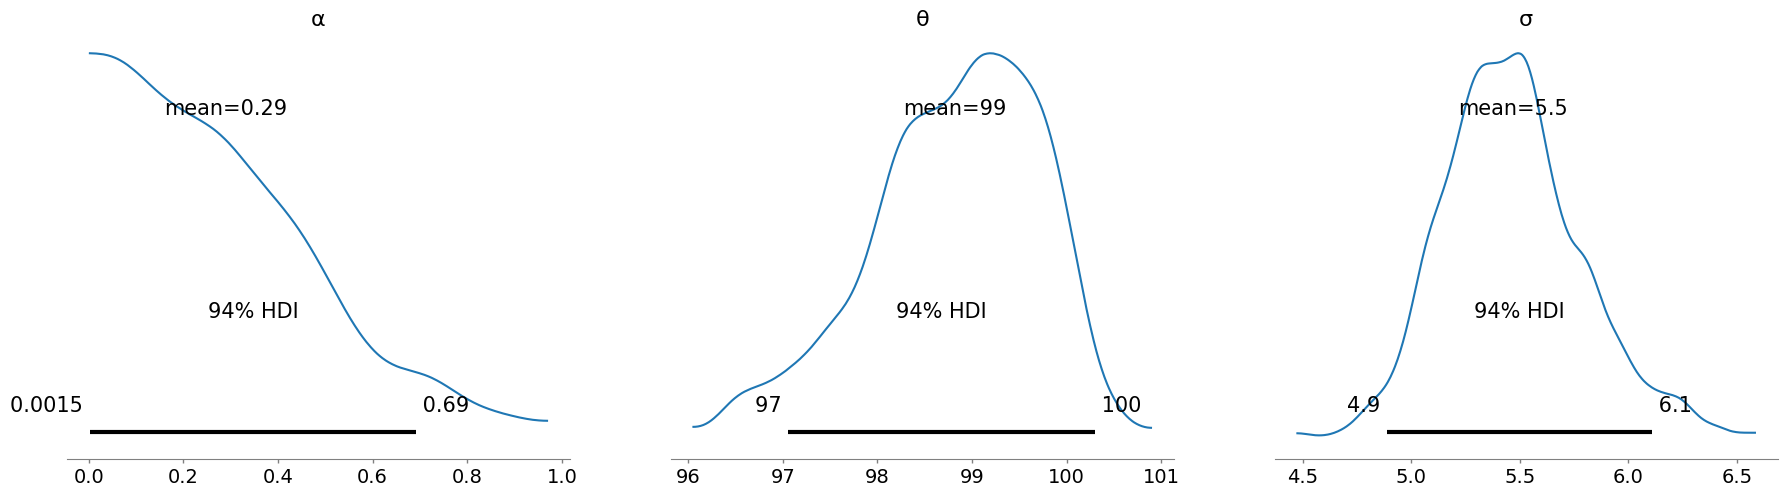

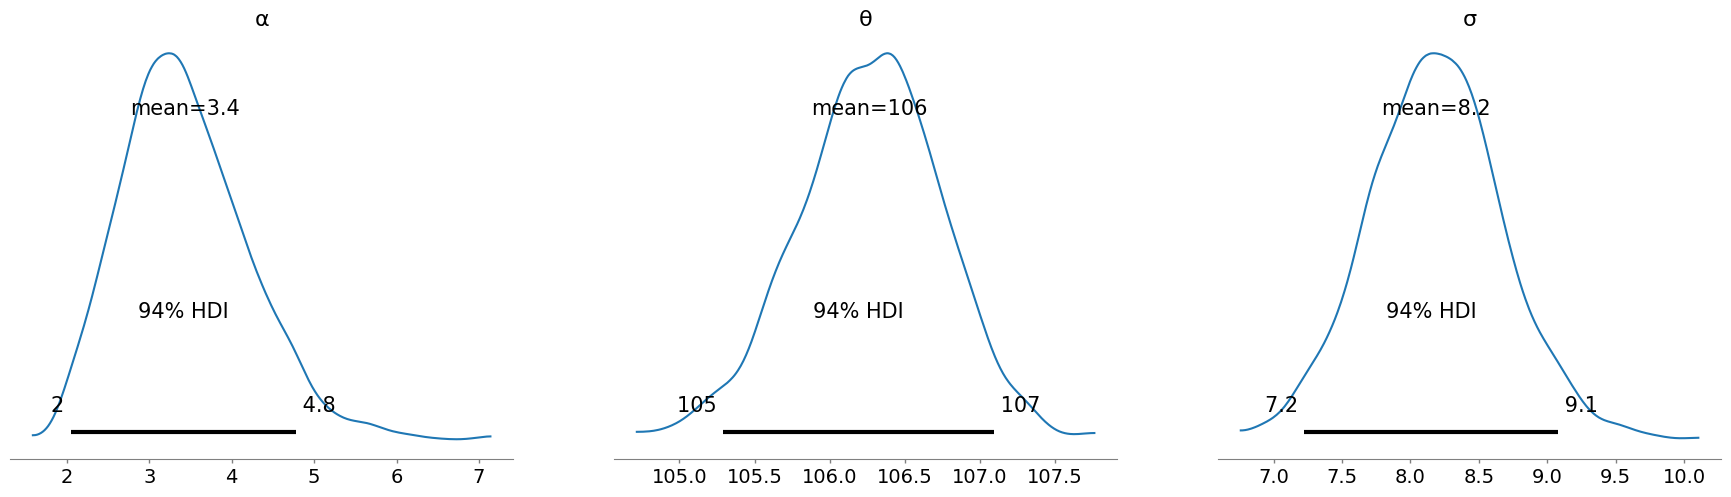

In [ ]:
az.plot_posterior(idata_temps2)
az.plot_posterior(idata_temps3)

In [ ]:
# Top is posterior with alpha = Halfnormal and bottom is posterior with alpha = -Halfnormal

It's always great when normal dist'ns turn into normal dist'ns.

I mainly did this in two parts because I wasn't sure if the syntax for the second one would work. Since it does, the top one is kind of pointless.

The top one is just messed up because it has right skew. The skew should be to the left so the top one tried to make it's skew as low as possible.

The bottom one is a bunch of bell curves that somehow came from half normal dist'ns. They could work, but I'm unsure of that until the ppc test. Theta is likely between 105 and 107, and based on how the last model ran and looked on the ppc, that looks like the right theta. Sigma is aroun 7.2 to 9.1, which seems right based on how the weather differs (from 85-109 usually). I have no idea how exactly alpha impacts the skew normal distribution, but maybe alpha being 3.4 will create a good skew.

In [ ]:
pm.sample_posterior_predictive(idata_temps2, model=wmbyN_FT_model2, extend_inferencedata=True)
pm.sample_posterior_predictive(idata_temps3, model=wmbyN_FT_model3, extend_inferencedata=True)

Output()

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

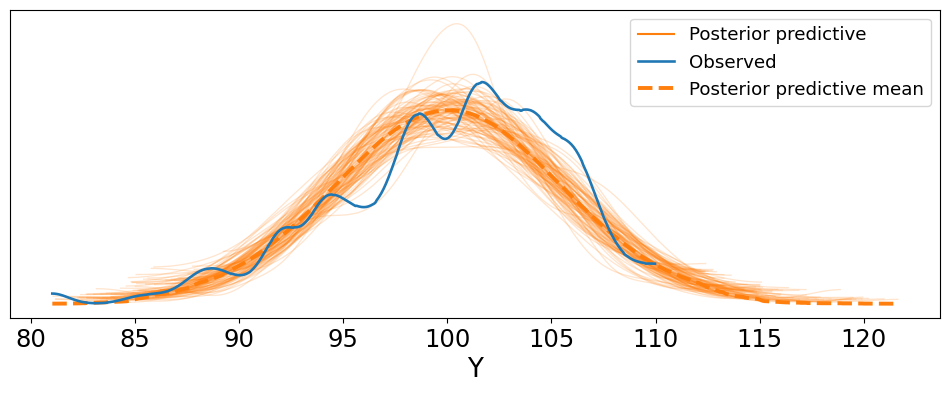

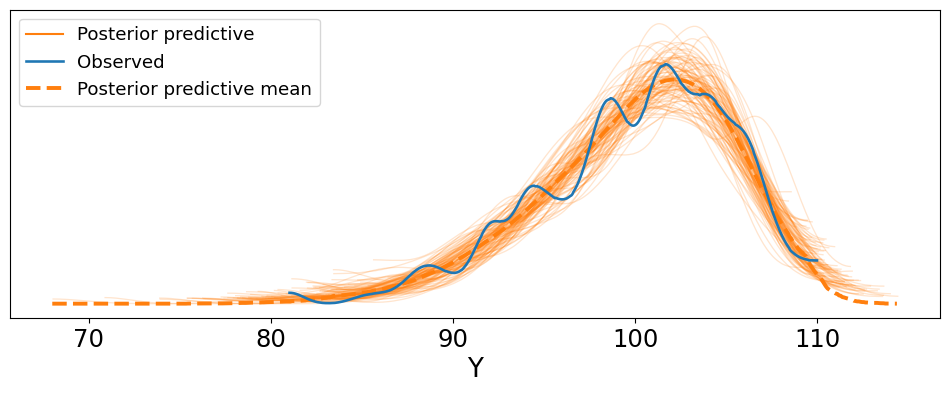

In [ ]:
az.plot_ppc(idata_temps2, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
az.plot_ppc(idata_temps3, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

That's a pretty good fit. It's accurate and precise (excpet and the peak). The variability rarely becomes more extreme then the variability in the data. Like before, the general shape of being bell curved and skewed left is there.

In [ ]:
with pm.Model() as wmbyN_FT_model4:
  θ = pm.Weibull('θ', alpha = 25, beta = 103)
  sig = pm.HalfNormal('σ', sigma=dataSTD)
  alp = pm.Uniform('α', lower=-5, upper=-2)
  Y = pm.SkewNormal('Y' , mu = θ, sigma = sig, alpha = alp, observed = numpyTemps)
  idata_temps4 = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'α'}>, <Axes: title={'center': 'θ'}>,
       <Axes: title={'center': 'σ'}>], dtype=object)

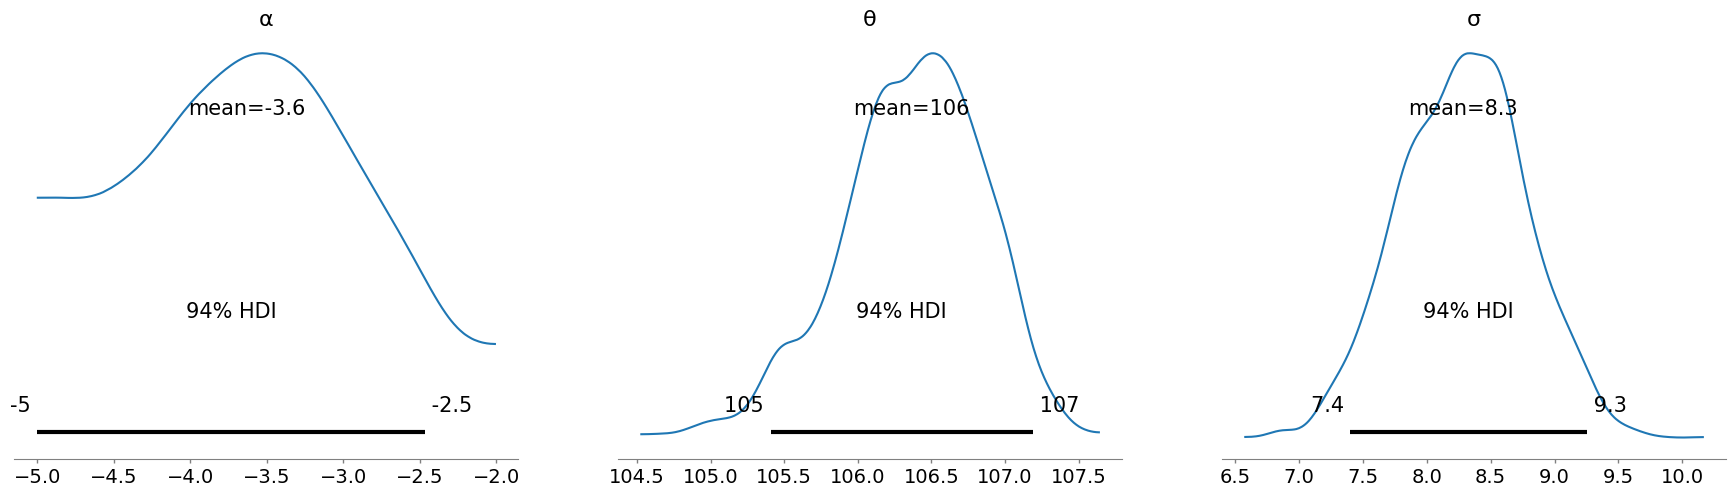

In [ ]:
az.plot_posterior(idata_temps4)

The posterior for theta and sigma is almost the same as before so I won't talk about it. The model believes alpha is around -3.6 but is unsure as to exactly where in the range -5 to -2.5 it is. The model is unsure as to what the true skew is.

Output()

<Axes: xlabel='Y'>

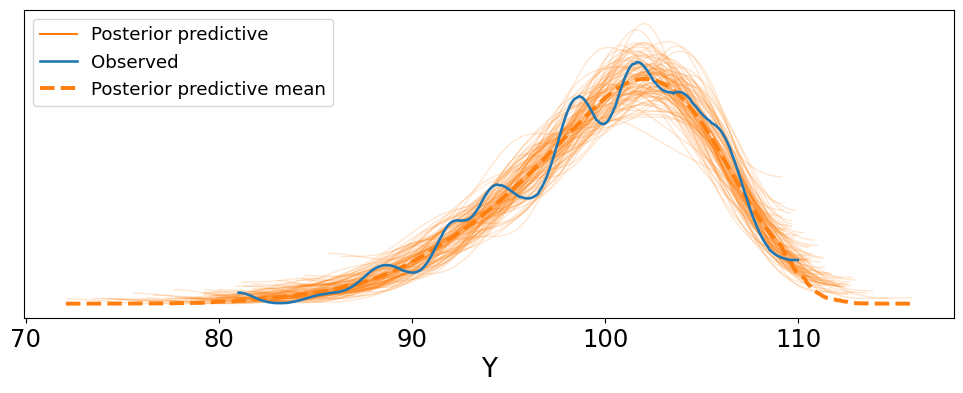

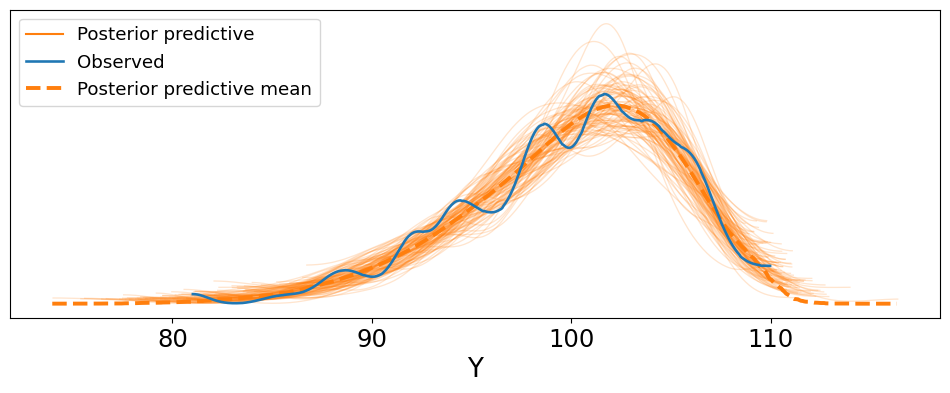

In [ ]:
pm.sample_posterior_predictive(idata_temps4, model=wmbyN_FT_model4, extend_inferencedata=True)
az.plot_ppc(idata_temps3, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
az.plot_ppc(idata_temps4, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

In [ ]:
# Top is ppc with HalfNormal prior for alpha and bottom is with Uniform prior.
# They both fit really well and mean the posteriors are good (according to the data atleast.)
# I've already talked about the first, and there is not much more to say about the second. They are practically the same.

#### **Fit of SkewNormal dist'ns**

The SkewNormal distributions seem to work really well in matching the data. They also fit my conceptual understanding of what should be happening in the distribution. I'm going to test the Weibull dist'n as a likelihood just to see if anything special happens.

#### Testing Likelihoods from a Weibull likelihood

A Weibull distribution has no center value, so I'm going to need two entirely new priors. There seems no reason the values would be above or below the ones I gave in the previous prior (the previous prior seemed a good model), so I'm going to assume the true values of alpha and beta are centered around the values in my previous prior and that they can be modelled by normal distributions. Doing this also carries over all the other assumptions from my first prior.

In [ ]:
with pm.Model() as wmbyN_FT_model5:
  alp = pm.Normal('α', mu=25, sigma=3)
  bet = pm.Normal('B', mu=103, sigma=3)
  Y = pm.Weibull('Y', alpha = alp, beta = bet, observed = numpyTemps)
  idata_temps5 = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'B'}>, <Axes: title={'center': 'α'}>],
      dtype=object)

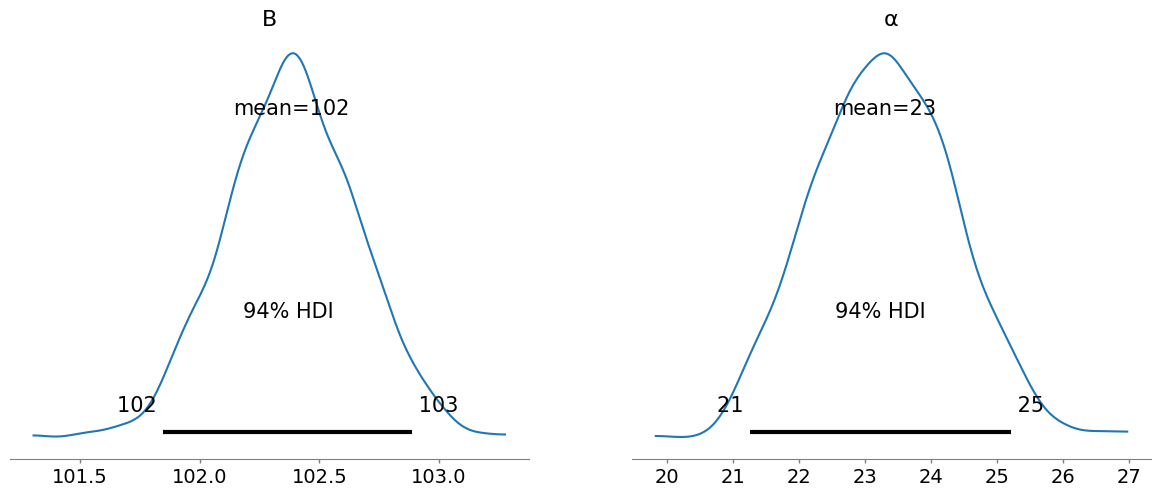

In [ ]:
az.plot_posterior(idata_temps5)

In [ ]:
# ^ posteriors with ppc as likelihood

Output()

<Axes: xlabel='Y'>

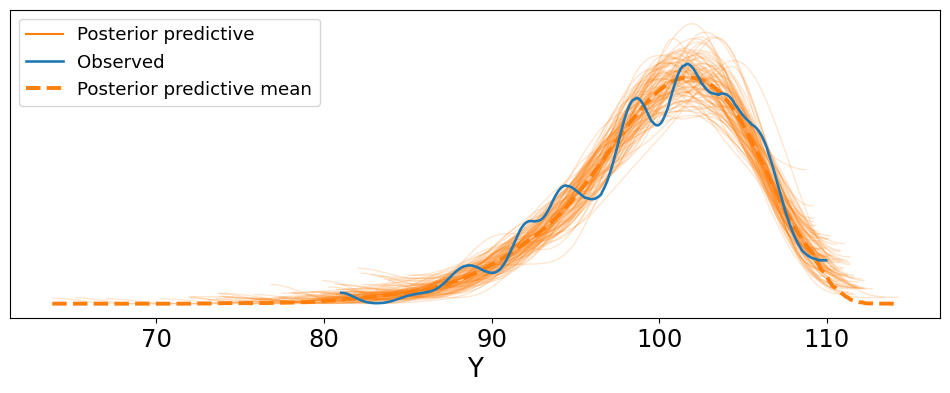

In [ ]:
pm.sample_posterior_predictive(idata_temps5, model=wmbyN_FT_model5, extend_inferencedata=True)
az.plot_ppc(idata_temps5, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

In [ ]:
# ^ ppc of Weibull dist'n and likelihood

##### **Fit of Weibull dist'n**

The ppc looks very similar to the others. It isn't bad but there is nothing special about it. Due to this, I'm going to pick to use the SkewNormal because skew normal just seems more natural than Weibull.

In [ ]:
print(idata_temps5.posterior_predictive.mean())

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    Y        float64 8B 100.0


### New Priors and the Likelihood

In [ ]:
print(dataSTD, dataSTD*dataSkew*.83, idata_temps4.posterior_predictive.mean())

5.265976144925281 -2.6864314093928314 <xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    Y        float64 8B 100.0


I ended up adding a HalfNormal(5.266) distribution as my prior for the sigma and a Uniform(-5,-2) distribution as my prior for the alpha. The assumptions that this adds is primarily that the standard deviation is likely to be close to 0 (the farther out from 0 the standard deviation is the less likely the standard deviation is) and the skew is defined by an alpha that is somewhere between -5 and -2, every value being just as likely. I don't think using a HalfNormal distribution for the prior of alpha makes sense. Alpha will be a bit distanced from the center and it won't be more likely to be close to 0 than farther.

**This** makes sense because it's unlikely that the true variation of the weather in the summer is that great. It's usually in the 90s and 100s, without anything more extreme. I have no clue what the true skew in nature is for temperatures, but I know it's negative.



**My** final likilhood is a normal skew distribution. It matches the left skew in the data and comes up with a pretty good ppc check.


**The** final distributions for the likelihood of all the parameters are:

array([<Axes: title={'center': 'α'}>, <Axes: title={'center': 'θ'}>,
       <Axes: title={'center': 'σ'}>], dtype=object)

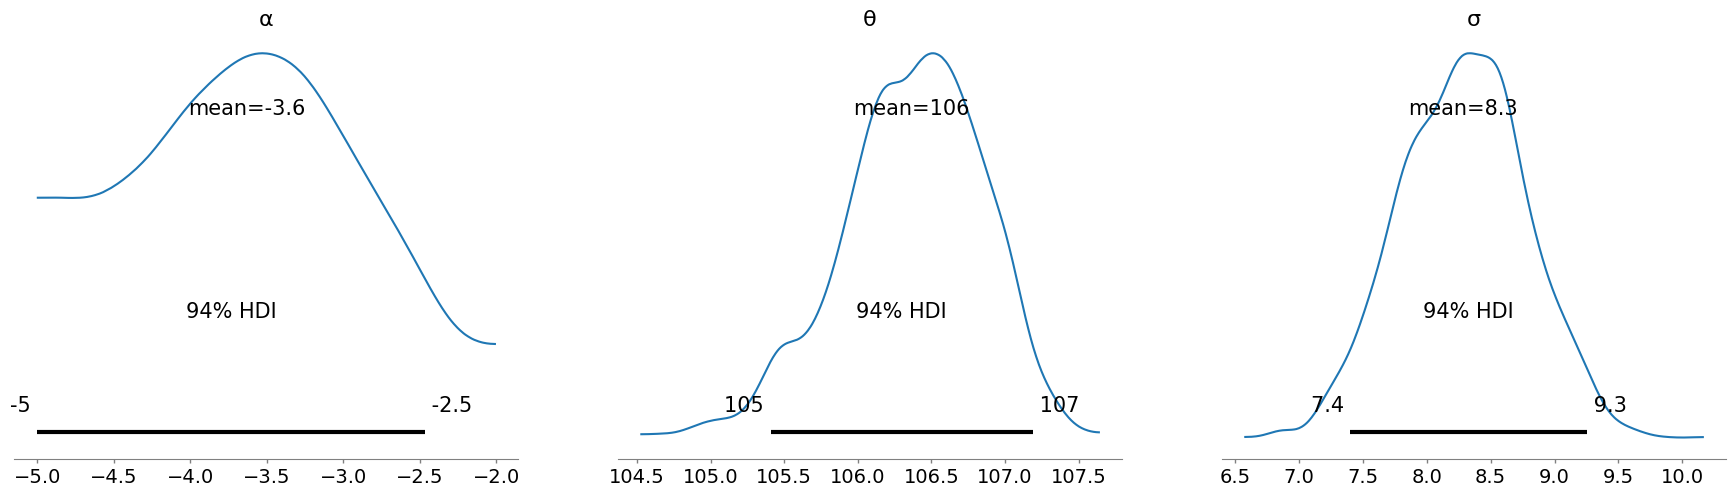

In [ ]:
az.plot_posterior(idata_temps4)

Alpha seems like it could still be anywhere from -5 to -2.5. It is most likely 3.6, but nothing can be ruled out. The mean (if it wasn't skewed) is inbetween 105 and 107. This is wildly different than the data, but it's okay because the skew will draw the mean back to 100. The standard deviation is inbetween 7.4 and 9.3. This just accounts for the large variety of temperatures, from the 80s to 110s.

Using the mean of each to make a distribution:

<Axes: >

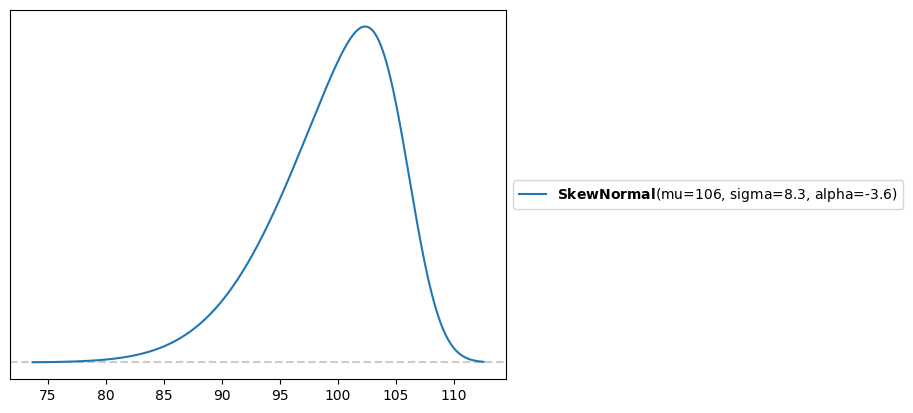

In [ ]:
pz.SkewNormal(mu=106,sigma=8.3,alpha=-3.6).plot_pdf()

It's a shape. Skewed left and has a peak around 102.5.

<Axes: >

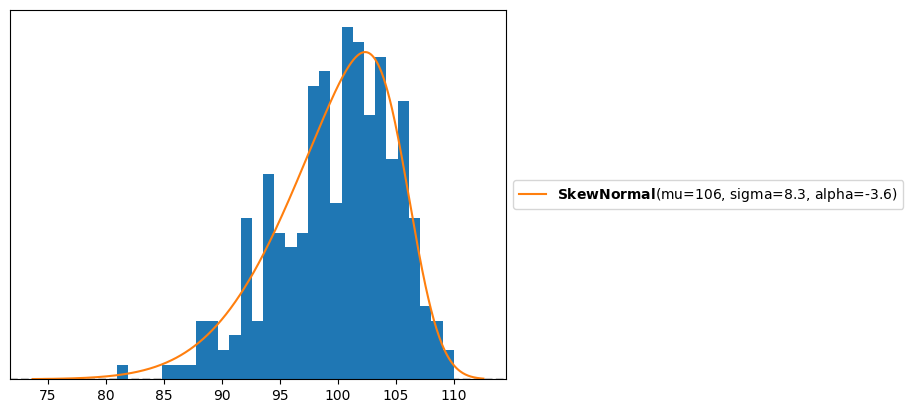

In [ ]:
plt.hist(numpyTemps, bins=30, weights=[1/len(numpyTemps)]*len(numpyTemps))
pz.SkewNormal(mu=106,sigma=8.3,alpha=-3.6).plot_pdf()

When put with the data, the model looks pretty good. It seems to be ignoring a couple high numbers around 90-95 and assumes them to be noise. It also assumes the peaks of the values 95-105 are closer to the true percents than the big drops are. It also looks like it might be underestimating outliers below 85, though it's hard to say when the values are all so low.

## Conclusion

It looks good, it models well, and it says it will be hot.

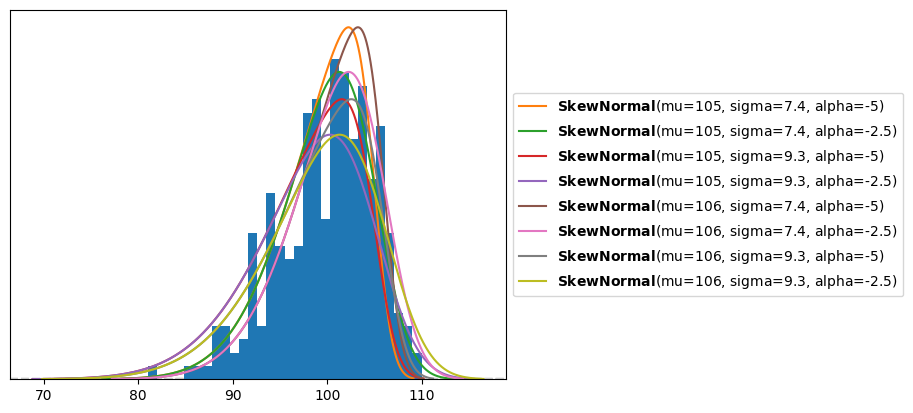

In [ ]:
plt.hist(numpyTemps, bins=30, weights=[1/len(numpyTemps)]*len(numpyTemps))
muV = [105,106]
sigV = [7.4,9.3]
alpV = [-5,-2.5]
for muM in muV:
  for sigM in sigV:
    for alpM in alpV:
      pz.SkewNormal(mu=muM,sigma=sigM,alpha=alpM).plot_pdf()

The general variability of the posterior.